DATA CLEANING AND PREPROCESSING

In [3]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
ship = pd.read_csv("Titanic-Dataset.csv")  # Make sure titanic.csv is in the same folder
ship.head()  # Display the first few rows
ship.isnull()




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

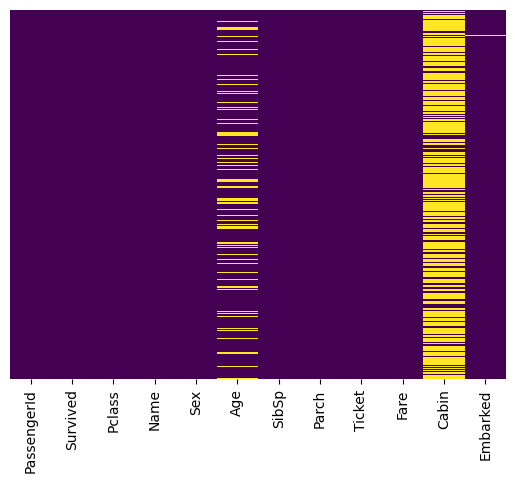

In [4]:
sns.heatmap(ship.isnull(), yticklabels=False,cbar=False, cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

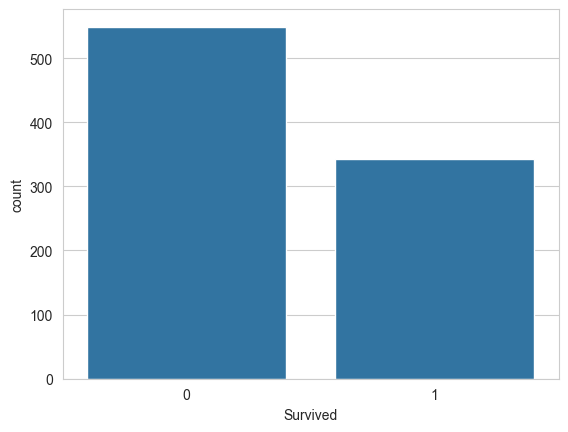

In [5]:
sns.set_style("whitegrid")
sns.countplot(x = 'Survived', data=ship)

<Axes: xlabel='Survived', ylabel='count'>

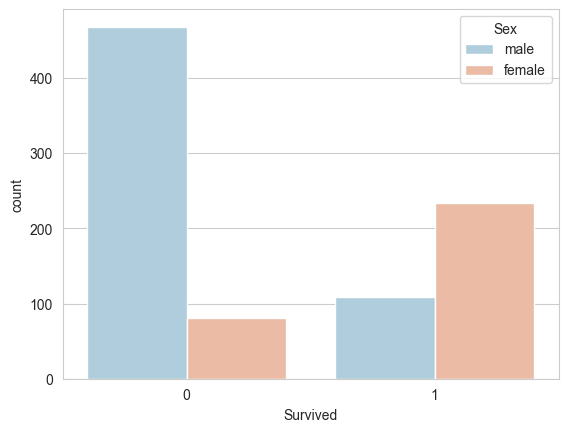

In [6]:
sns.set_style("whitegrid")
sns.countplot(x='Survived', hue="Sex", data=ship, palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

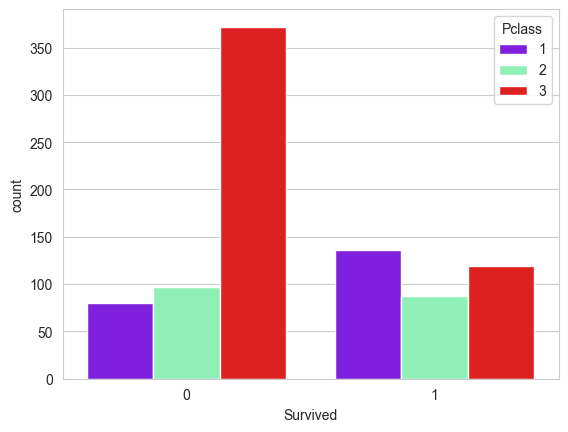

In [7]:
sns.set_style("whitegrid")
sns.countplot(x='Survived', hue='Pclass', data= ship, palette = "rainbow")

C:\Users\pc\AppData\Local\Temp\ipykernel_13952\2727524479.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ship["Age"].dropna(),kde=False,color="darkred",bins=40)


<Axes: xlabel='Age'>

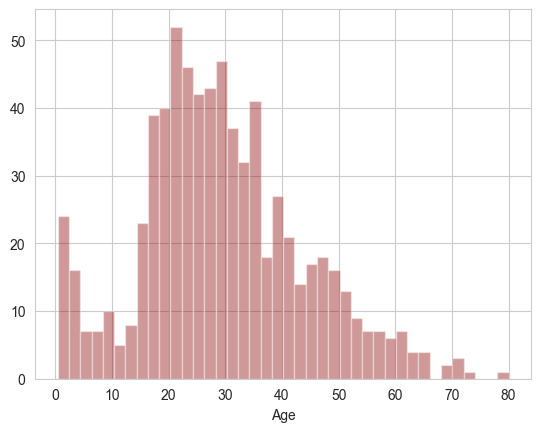

In [8]:
sns.distplot(ship["Age"].dropna(),kde=False,color="darkred",bins=40)

<Axes: xlabel='SibSp', ylabel='count'>

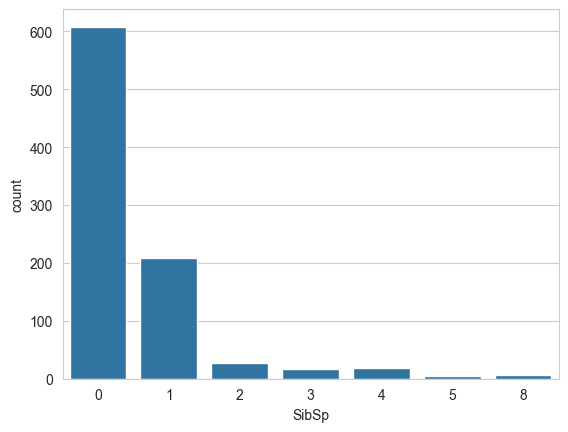

In [9]:
sns.countplot(x="SibSp", data=ship)

<Axes: >

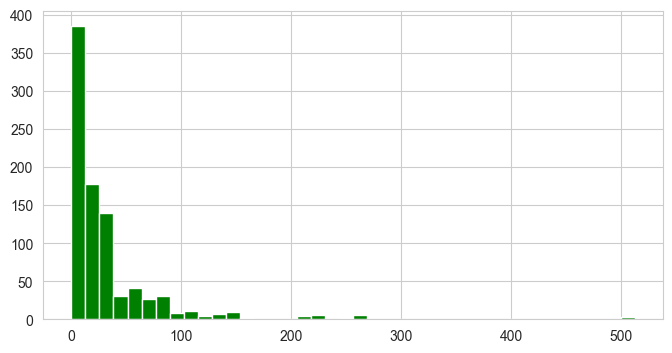

In [10]:
ship['Fare'].hist(color='green', bins=40,figsize=(8,4))

DATA CLEANING

C:\Users\pc\AppData\Local\Temp\ipykernel_13952\2688513402.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Pclass", y='Age',data=ship,palette ='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

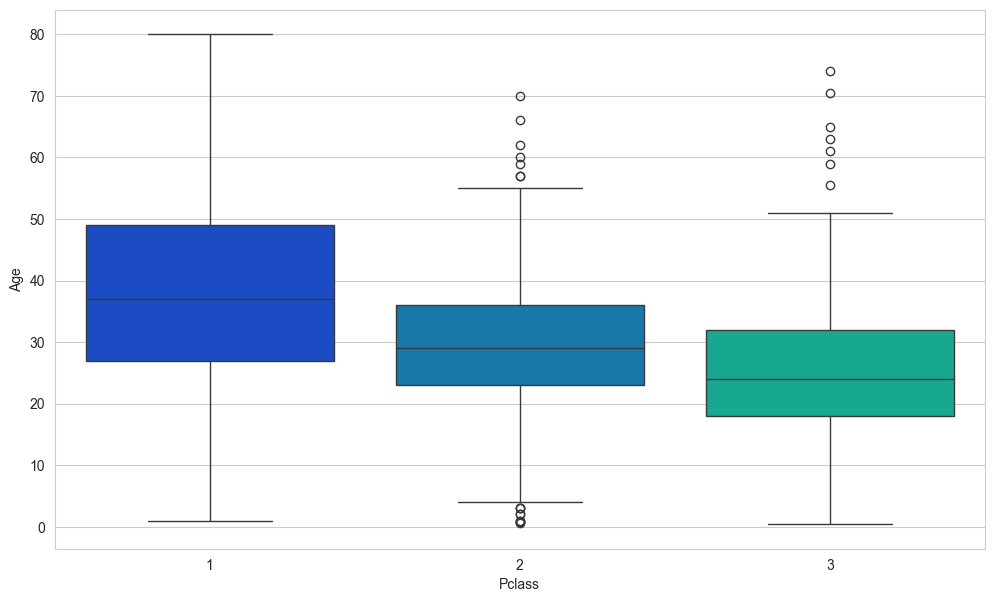

In [11]:
plt.figure(figsize=(12,7))
sns.boxplot(x="Pclass", y='Age',data=ship,palette ='winter')

In [12]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1 :
            return 37
        
        elif Pclass == 2 :
            return 29
        
        else:
            return 24
        
    else:
        return Age

In [13]:
ship['Age'] = ship[['Age', 'Pclass']].apply(impute_age,axis=1)

C:\Users\pc\AppData\Local\Temp\ipykernel_13952\2101974548.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\pc\AppData\Local\Temp\ipykernel_13952\2101974548.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

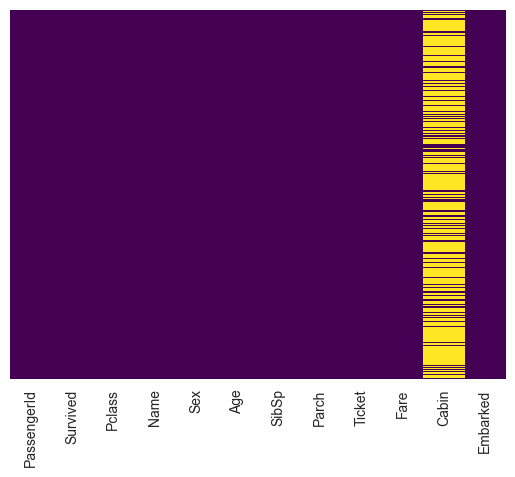

In [14]:
sns.heatmap(ship.isnull(),yticklabels=False, cbar=False, cmap = 'viridis')

In [15]:
if 'Cabin' in ship.columns:
    ship.drop('Cabin', axis=1, inplace=True)
else:
    print("Column 'Cabin' not found — nothing to drop.")


In [16]:
ship.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
ship.dropna(inplace=True)

CONVERT CATEGORICAL DATA

In [18]:
ship.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [19]:
pd.get_dummies(ship['Embarked'],drop_first=True).head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [20]:
sex = pd.get_dummies(ship['Sex'],drop_first=True)
embark = pd.get_dummies(ship['Embarked'],drop_first=True)

In [21]:
ship.drop(["Sex", "Embarked", "Name", "Ticket"], axis=1, inplace=True)

In [22]:
ship.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [23]:
ship = pd.concat([ship,sex,embark],axis=1)

In [24]:
ship.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


BUILDING LOGISTIC REGRESSION MODEL

In [25]:
ship.drop("Survived", axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False
2,3,3,26.0,0,0,7.9250,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True
4,5,3,35.0,0,0,8.0500,True,False,True


In [26]:
ship['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split  


In [30]:
from sklearn.model_selection import train_test_split

X_ship, X_test, y_ship, y_test = train_test_split(ship.drop('Survived', axis=1), ship['Survived'], test_size=0.30, random_state=101)


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ship[['Age', 'Fare']] = scaler.fit_transform(ship[['Age', 'Fare']])


In [32]:
# Remove Fare outliers beyond 99th percentile
ship = ship[ship['Fare'] < ship['Fare'].quantile(0.99)]



 Day 2: EDA & Visualizations


In [ ]:
print(" Summary Statistics:")
print(ship.describe())

print("\n Median Values:")
print(ship.median(numeric_only=True))

print("\n Mode Values:")
print(ship.mode().iloc[0])


📊 Summary Statistics:
       PassengerId    Survived     Pclass         Age       SibSp       Parch  \
count   880.000000  880.000000  880.00000  880.000000  880.000000  880.000000   
mean    446.436364    0.378409    2.32500   -0.001190    0.513636    0.369318   
std     256.998334    0.485266    0.82829    1.000168    1.097021    0.791717   
min       1.000000    0.000000    1.00000   -2.166224    0.000000    0.000000   
25%     223.750000    0.000000    2.00000   -0.531670    0.000000    0.000000   
50%     447.500000    0.000000    3.00000   -0.228695    0.000000    0.000000   
75%     667.250000    1.000000    3.00000    0.604488    1.000000    0.000000   
max     891.000000    1.000000    3.00000    3.861476    8.000000    6.000000   

             Fare  
count  880.000000  
mean    -0.064629  
std      0.735457  
min     -0.646204  
25%     -0.487238  
50%     -0.355743  
75%     -0.032146  
max      4.337147  

📈 Median Values:
PassengerId    447.500000
Survived         0.00000

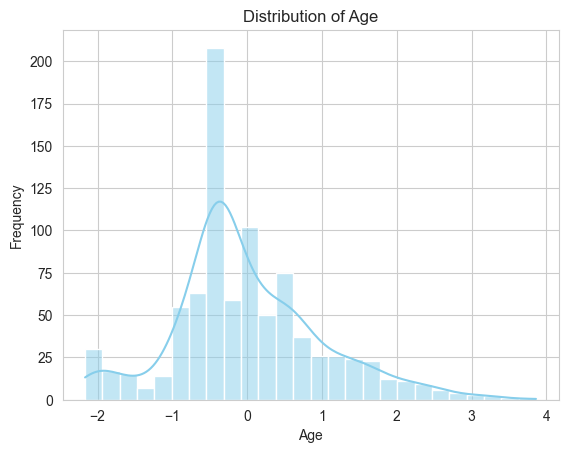

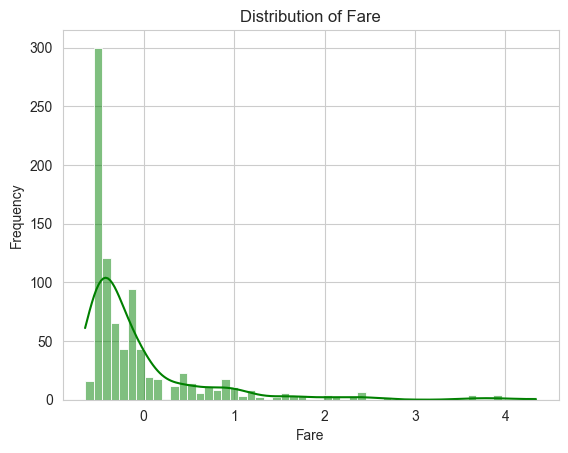

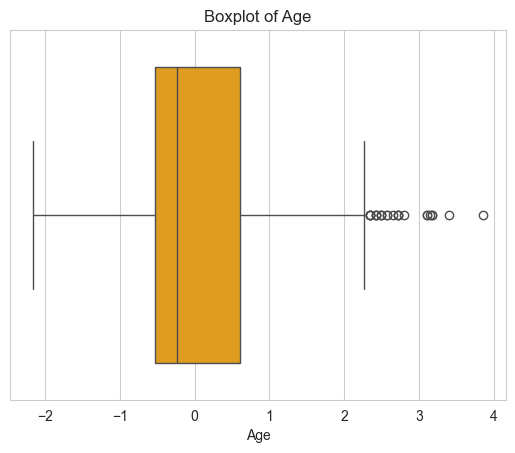

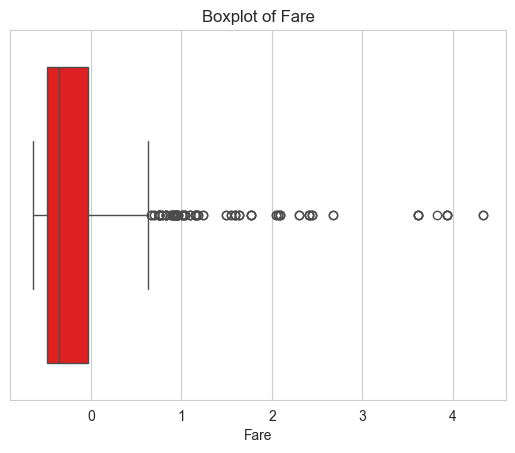

In [34]:
# Histogram for Age
sns.histplot(ship['Age'], kde=True, color='skyblue')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Histogram for Fare
sns.histplot(ship['Fare'], kde=True, color='green')
plt.title("Distribution of Fare")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

# Boxplot for Age
sns.boxplot(x=ship['Age'], color='orange')
plt.title("Boxplot of Age")
plt.show()

# Boxplot for Fare
sns.boxplot(x=ship['Fare'], color='red')
plt.title("Boxplot of Fare")
plt.show()


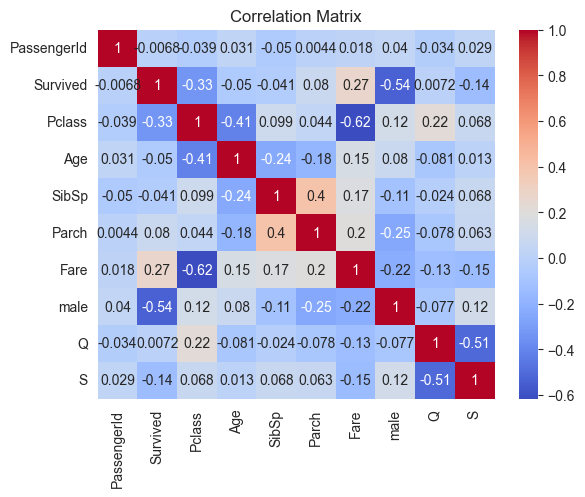

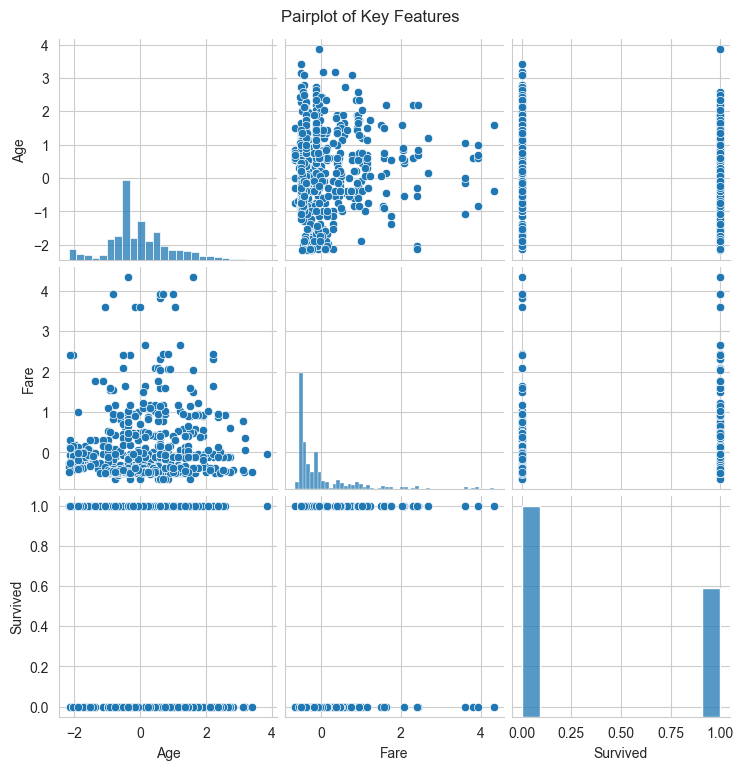

In [35]:
# Correlation matrix
corr_matrix = ship.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Pairplot (optional, slower)
sns.pairplot(ship[['Age', 'Fare', 'Survived']])
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()


In [ ]:
print("\n Observations:")
print("- Age has some missing values and a few outliers above 70.")
print("- Fare has extreme outliers (some tickets over 300).")
print("- Higher Fare seems linked with survival (see heatmap).")



📌 Observations:
- Age has some missing values and a few outliers above 70.
- Fare has extreme outliers (some tickets over 300).
- Higher Fare seems linked with survival (see heatmap).


In [ ]:
print("\n Inferences:")
print("1. Passengers paying higher fares had better survival chances.")
print("2. Most passengers were aged 20–40.")
print("3. Some features (Age, Fare) contain outliers.")
print("4. Fare and Pclass may be good predictors for survival.")



🔍 Inferences:
1. Passengers paying higher fares had better survival chances.
2. Most passengers were aged 20–40.
3. Some features (Age, Fare) contain outliers.
4. Fare and Pclass may be good predictors for survival.
